# 빅데이터 분석 특강 (1주차) 3월7일 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis]

### 로드맵 

`-` 오늘수업할내용: 단순선형회귀 

`-` 단순선형회귀를 배우는 이유? 

- 우리가 배우고싶은것: 심층신경망(DNN) $\to$ 합성곱신경망(CNN) $\to$ 적대적생성신경망(GAN) 
- 심층신경망을 바로 이해하기 어려움 
- 다음의 과정으로 이해해야함: (선형대수학 $\to$) 회귀분석 $\to$ 로지스틱회귀분석 $\to$ 심층신경망 

### 선형회귀 

`-` 상황극
- 나는 동네에 커피점을 하나 차렸음. 
- 장사를 하다보니까 날이 더울수록 아이스아메리카노의 판매량이 증가한다는 사실을 깨달았다. 
- 일기예보는 미리 나와있으니까 그 정보를 잘 이용하면 '온도 -> 아이스아메리카노 판매량 예측' 이 가능할것 같다. (내가 앞으로 얼마나 벌지 예측가능) 

`-` 가짜자료 생성 

In [2]:
import matplotlib.pyplot as plt 
import tensorflow as tf 

온도 ${\bf x}$가 아래와 같다고 하자. 

In [3]:
x=tf.constant([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]) # 기온 
x

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4],
      dtype=float32)>

아이스아메리카노의 판매량 ${\bf y}$이 아래와 같다고 하자. (판매량은 정수로 나오겠지만 편의상 소수점도 가능하다고 생각하자) 

$${\bf y} \approx 10.2 +2.2 {\bf x}$$ 

- 여기에서 10.2, 2.2 의 숫자는 제가 임의로 정한것임 
- 식의의미: 온도가 0일때 10.2잔정도 팔림 + 온도가 1도 증가하면 2.2잔정도 더 팔림 
- 물결의의미: 현실반영. 세상은 꼭 수식대로 정확하게 이루어지지 않음. 

In [4]:
tf.random.set_seed(43052)
epsilon=tf.random.normal([10])
y=10.2 + 2.2*x + epsilon
y

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([55.418365, 58.194283, 61.230827, 62.312557, 63.107002, 63.69569 ,
       67.247055, 71.4365  , 73.1013  , 77.84988 ], dtype=float32)>

`-` 우리는 아래와 같은 자료를 모았다고 생각하자.  

In [7]:
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 55.418365],
       [22.2     , 58.194283],
       [22.7     , 61.230827],
       [23.3     , 62.312557],
       [24.4     , 63.107002],
       [25.1     , 63.69569 ],
       [26.2     , 67.247055],
       [27.3     , 71.4365  ],
       [28.4     , 73.1013  ],
       [30.4     , 77.84988 ]], dtype=float32)>

`-` 그려보자. 

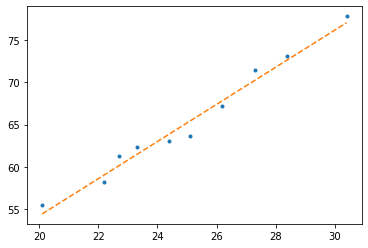

In [9]:
plt.plot(x,y,'.') # 파란점, 관측한 데이터 
plt.plot(x,10.2 + 2.2*x, '--')  # 주황색점선, 세상의 법칙 

`-` 우리의 목표: 파란색점 $\to$ 주황색점선을 추론 // 데이터를 바탕으로 세상의 법칙을 추론 

`-` 아이디어: 데이터를 보니까 $x$와 $y$가 선형의 관계에 있는듯 보인다. 즉 모든 $i=1,2,\dots, 10$에 대하여 아래를 만족하는 적당한 a,b (혹은 $\beta_0,\beta_1$) 가 존재할것 같다. 
- $y_{i} \approx ax_{i}+b$
- $y_{i} \approx \beta_1 x_{i}+\beta_0$ 

`-` 어림짐작으로 $a,b$를 알아내보자. 

데이터를 살펴보자. 

In [10]:
tf.transpose(tf.concat([[x],[y]],0))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[20.1     , 55.418365],
       [22.2     , 58.194283],
       [22.7     , 61.230827],
       [23.3     , 62.312557],
       [24.4     , 63.107002],
       [25.1     , 63.69569 ],
       [26.2     , 67.247055],
       [27.3     , 71.4365  ],
       [28.4     , 73.1013  ],
       [30.4     , 77.84988 ]], dtype=float32)>

적당히 `왼쪽*2+15 = 오른쪽`의 관계가 성립하는것 같다. 

따라서 $a=2, b=15$ 혹은 $\beta_0=15, \beta_1=2$ 로 추론할 수 있겠다. 

`-` 누군가가 $(\beta_0,\beta_1)=(14,2)$ 이라고 주장할 수 있다. (어차피 지금은 감각으로 추론하는 과정이니까) 

`-` 새로운 주장으로 인해서 $(\beta_0,\beta_1)=(15,2)$ 로 볼 수도 있고 $(\beta_0,\beta_1)=(14,2)$ 로 볼 수도 있다. 이중에서 어떠한 추정치가 좋은지 판단할 수 있을까? 
- 후보1: $(\beta_0,\beta_1)=(15,2)$ 
- 후보2: $(\beta_0,\beta_1)=(14,2)$

`-` 가능한 $y_i \approx \beta_0 + \beta_1 x_i$ 이 되도록 만드는 $(\beta_0,\beta_1)$ 이 좋을 것이다. $\to$ 후보 1,2를 비교해보자. 

(관찰에 의한 비교) 

후보1에 대해서 $i=1,2$를 넣고 관찰하여 보자. 

In [11]:
20.1 * 2 + 15 , 55.418365 # i=1 

(55.2, 55.418365)

In [12]:
22.2 * 2 + 15 , 58.194283 # i=2

(59.4, 58.194283)

후보2에 대하여 $i=1,2$를 넣고 관찰하여 보자. 

In [13]:
20.1 * 2 + 14 , 55.418365 # i=1 

(54.2, 55.418365)

In [14]:
22.2 * 2 + 14 , 58.194283 # i=2

(58.4, 58.194283)

$i=1$인 경우에는 후보1이 더 잘맞는것 같은데 $i=2$인 경우는 후보2가 더 잘맞는것 같다. 

(좀 더 체계적인 비교) 

$i=1,2,3, \dots, 10$ 에서 후보1과 후보2중 어떤것이 더 좋은지 비교하는 체계적인 방법을 생각해보자. 

후보 1,2에 대하여 $\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$를 계산하여 비교해보자. 

In [15]:
sum1=0 
for i in range(10):
    sum1=sum1+(y[i]-15-2*x[i])**2 

In [16]:
sum2=0 
for i in range(10):
    sum2=sum2+(y[i]-14-2*x[i])**2 

In [17]:
sum1,sum2

(<tf.Tensor: shape=(), dtype=float32, numpy=14.734169>,
 <tf.Tensor: shape=(), dtype=float32, numpy=31.521088>)

후보1이 더 $\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$의 값이 작다. 

후보1이 종합적으로 후보2에 비하여 좋다. 이 과정을 무한번 반복하면 최적의 추정치를 찾을 수 있다. 

`-` 그런데 이 알고리즘은 현실적으로 구현이 불가능하다. 
- 무한번 계산하기도 힘들고,
- 언제 멈출지도 애매함

`-` 수학을 이용해서 좀 더 체계적으로 찾아보자. 결국 아래식을 가장 작게 만드는 $\beta_0,\beta_1$을 찾으면 된다. 

$\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2$

그런데 결국 $\beta_0, \beta_1$에 대한 이차식인데 이 식을 최소화하는 $\beta_0,\beta_1$을 구하기 위해서는 아래를 연립하여 풀면된다. 

$\begin{cases}
\frac{\partial}{\partial \beta_0}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0 \\ 
\frac{\partial}{\partial \beta_1}\sum_{i=1}^{10} (y_i -\beta_0 -\beta_1 x_i)^2=0
\end{cases}$

`-` 풀어보자. 

$\begin{cases}
\sum_{i=1}^{10} -2(y_i -\beta_0 -\beta_1 x_i)=0 \\ 
\sum_{i=1}^{10} -2x_i(y_i -\beta_0 -\beta_1 x_i)=0
\end{cases}$

정리하면 

$$\hat{\beta}_0= \bar{y}-\hat{\beta}_1 \bar{x}$$

$$\hat{\beta}_1= \frac{S_{xy}}{S_{xx}}=\frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n}(x_i-\bar{x})^2}$$

`-` 따라서 최적의 추정치 $(\hat{\beta}_0,\hat{\beta}_1)$를 이용한 추세선을 아래와 같이 계산할 수 있음.

In [18]:
Sxx= sum((x-sum(x)/10)**2)
Sxx

<tf.Tensor: shape=(), dtype=float32, numpy=87.848976>

In [19]:
Sxy=  sum((x-sum(x)/10)*(y-sum(y)/10))
Sxy

<tf.Tensor: shape=(), dtype=float32, numpy=194.64737>

In [20]:
beta1_estimated = Sxy/Sxx 
beta1_estimated 

<tf.Tensor: shape=(), dtype=float32, numpy=2.2157044>

In [21]:
beta0_estimated = sum(y)/10 - beta1_estimated * sum(x)/10 
beta0_estimated

<tf.Tensor: shape=(), dtype=float32, numpy=9.944572>

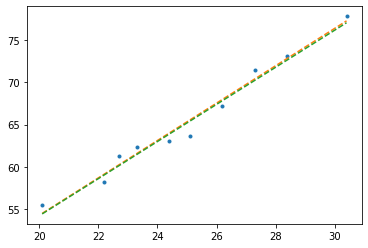

In [22]:
plt.plot(x,y,'.')
plt.plot(x,beta0_estimated + beta1_estimated * x, '--') # 주황색선: 세상의 법칙을 추정한선 
plt.plot(x,10.2 + 2.2* x, '--') # 초록색선: ture, 세상의법칙 

> Note: 샘플수가 커질수록 주황색선은 점점 초록색선으로 가까워진다. 

`-` 꽤 훌륭한 도구임. 그런데 약간의 단점이 존재한다. 

(1) 공식이 좀 복잡함.. 

(2) $x$가 여러개일 경우 확장이 어려움 

`-` 단점을 극복하기 위해서 우리가 지금까지 했던논의를 매트릭스로 바꾸어서 다시 써보자. 

`-` 모형의 매트릭스화 

우리의 모형은 아래와 같다. 

$y_i = \beta_0 + \beta_1 x_i + \epsilon_i, \quad i=1,2,\dots,10$ 

풀어서 쓰면 

$\begin{cases}
y_1 = \beta_0 +\beta_1 x_1 + \epsilon_1 \\ 
y_2 = \beta_0 +\beta_1 x_2 + \epsilon_2 \\ 
\dots \\ 
y_{10} = \beta_0 +\beta_1 x_{10} + \epsilon_{10} 
\end{cases}$

아래와 같이 쓸 수 있다.

$\begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\dots \\
y_{10} 
\end{bmatrix} 
= \begin{bmatrix} 
1 & x_1 \\ 
1 & x_2 \\ 
\dots & \dots \\
1 & x_{10} 
\end{bmatrix}\begin{bmatrix}\beta_0 \\ \beta_1 \end{bmatrix} + \begin{bmatrix} 
\epsilon_1 \\ 
\epsilon_2 \\ 
\dots \\
\epsilon_{10} 
\end{bmatrix} $

벡터와 매트릭스 형태로 정리하면 

${\bf y} = {\bf X} {\boldsymbol \beta} + \boldsymbol{\epsilon}$ 

`-` 손실함수의 매트릭스화: 우리가 최소화 하려던 손실함수는 아래와 같다. 

$loss=\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2$

이것을 벡터표현으로 하면 아래와 같다. 

$loss=\sum_{i=1}^{n}(y_i-\beta_0-\beta_1x_i)^2=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})$

풀어보면 

$loss=({\bf y}-{\bf X}{\boldsymbol \beta})^\top({\bf y}-{\bf X}{\boldsymbol \beta})={\bf y}^\top {\bf y} - {\bf y}^\top {\bf X}{\boldsymbol\beta} - {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$

`-` 미분하는 과정의 매트릭스화 

loss를 최소화하는 ${\boldsymbol \beta}$를 구해야하므로 loss를 ${\boldsymbol \beta}$로 미분한식을 0이라고 놓고 풀면 된다. 

$\frac{\partial}{\partial \boldsymbol{\beta}} loss = \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf y} - \frac{\partial}{\partial \boldsymbol{\beta}} {\bf y}^\top {\bf X}{\boldsymbol\beta} - \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf y} + \frac{\partial}{\partial \boldsymbol{\beta}} {\boldsymbol\beta}^\top {\bf X}^\top {\bf X} {\boldsymbol\beta}$ 

$= 0 - {\bf X}^\top {\bf y}- {\bf X}^\top {\bf y} + 2{\bf X}^\top {\bf X}{\boldsymbol\beta} $

따라서 $\frac{\partial}{\partial \boldsymbol{\beta}}loss=0$을 풀면 아래와 같다. 

$\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $

`-` 공식도 매트릭스로 표현하면: $\boldsymbol{\hat\beta}= ({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $ <-- 외우세요 

`-` 적용을 해보자. 

(X를 만드는 방법1) 

In [62]:
X=tf.transpose(tf.concat([[[1.0]*10],[x]],0)) # 
X 

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

(X를 만드는 방법2)

In [65]:
from tensorflow.python.ops.numpy_ops import np_config
np_config.enable_numpy_behavior()

In [68]:
X=tf.concat([[[1.0]*10],[x]],0).T
X

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]], dtype=float32)>

In [73]:
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([9.945175 , 2.2156773], dtype=float32)>

`-` 잘 구해진다. 

`-` 그런데.. 

In [74]:
beta0_estimated,beta1_estimated

(<tf.Tensor: shape=(), dtype=float32, numpy=9.94458>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.2157042>)

값이 좀 다르다..?

`-` 같은 값입니다! 신경쓰지 마세요! 텐서플로우가 좀 대충계산합니다. 

In [76]:
import tensorflow.experimental.numpy as tnp 

In [78]:
x=tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]) 
y=10.2 + 2.2*x + epsilon 

In [80]:
beta1_estimated = sum((x-sum(x)/10)*(y-sum(y)/10)) / sum((x-sum(x)/10)**2)
beta0_estimated = sum(y)/10 - beta1_estimated * sum(x)/10 

In [82]:
beta0_estimated, beta1_estimated

(<tf.Tensor: shape=(), dtype=float64, numpy=9.944573243234018>,
 <tf.Tensor: shape=(), dtype=float64, numpy=2.215704607783491>)

In [90]:
X=tnp.concatenate([[tnp.array([1.0]*10)],[x]],0).T
tf.linalg.inv(X.T @ X) @ X.T @ y

<tf.Tensor: shape=(2,), dtype=float64, numpy=array([9.94457324, 2.21570461])>

### 앞으로 할것 

`-` 선형대수학의 미분이론.. 

`-` 실습 (tensorflow에서 매트릭스를 자유롭게 다루비) 